In [1]:
import ccxt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
phemex = ccxt.phemex({
    'enableRateLimit': True,
    'apiKey': Private,
    'secret': Private
})

In [3]:
symbol = "BTCUSD"
timeframe = '1d'
limit = 5000

bars = phemex.fetch_ohlcv(symbol, timeframe = timeframe, limit = limit)
df_crypto = pd.DataFrame(bars, columns = ['timestamp' , 'open', 'high', 'low', 'close', 'volume'])
df_crypto['timestamp'] = pd.to_datetime(df_crypto['timestamp'], unit='ms')
df_crypto.set_index(df_crypto['timestamp'], inplace = True)
df_crypto.drop('timestamp', axis = 1, inplace = True )

In [4]:
ticker = "^GSPC"

start_date = "2022-04-18"
end_date = "2025-01-14"

df_stock = yf.download(ticker, start=start_date, end=end_date, interval="1d")

[*********************100%***********************]  1 of 1 completed


In [5]:
df_stock['Log_Return'] = np.log(df_stock['Open'] / df_stock['Close'].shift(1)) 
df_crypto['Log_Return'] = np.log(df_crypto['close'] / df_crypto['close'].shift(2)) #df_crypto['Log_Return'] = np.log(df_crypto['close'] / df_crypto['close'].shift(1)

In [6]:
return_df = pd.DataFrame(columns = ['S&P 500 daily log return' , 'BTCUSD daily log return'])

In [7]:
return_df['BTCUSD daily log return'] = df_crypto['Log_Return']
return_df['S&P 500 daily log return'] = df_stock['Log_Return']
return_df['Day_of_Week'] = return_df.index.day_name()
return_df = return_df[3:]
nan_mask = return_df["S&P 500 daily log return"].isna()
return_df['S&P 500 close days'] = nan_mask

In [8]:
return_df

,S&P 500 daily log return,BTCUSD daily log return,Day_of_Week,S&P 500 close days
timestamp,,,,
2022-04-23,NaN,-0.026417,Saturday,True
2022-04-24,NaN,-0.006395,Sunday,True
2022-04-25,-0.003856,0.025255,Monday,False
2022-04-26,-0.004194,-0.034621,Tuesday,False
2022-04-27,0.002708,-0.029871,Wednesday,False
...,...,...,...,...
2025-01-09,NaN,-0.045928,Thursday,True
2025-01-10,-0.004725,-0.004808,Friday,False
2025-01-11,NaN,0.020859,Saturday,True


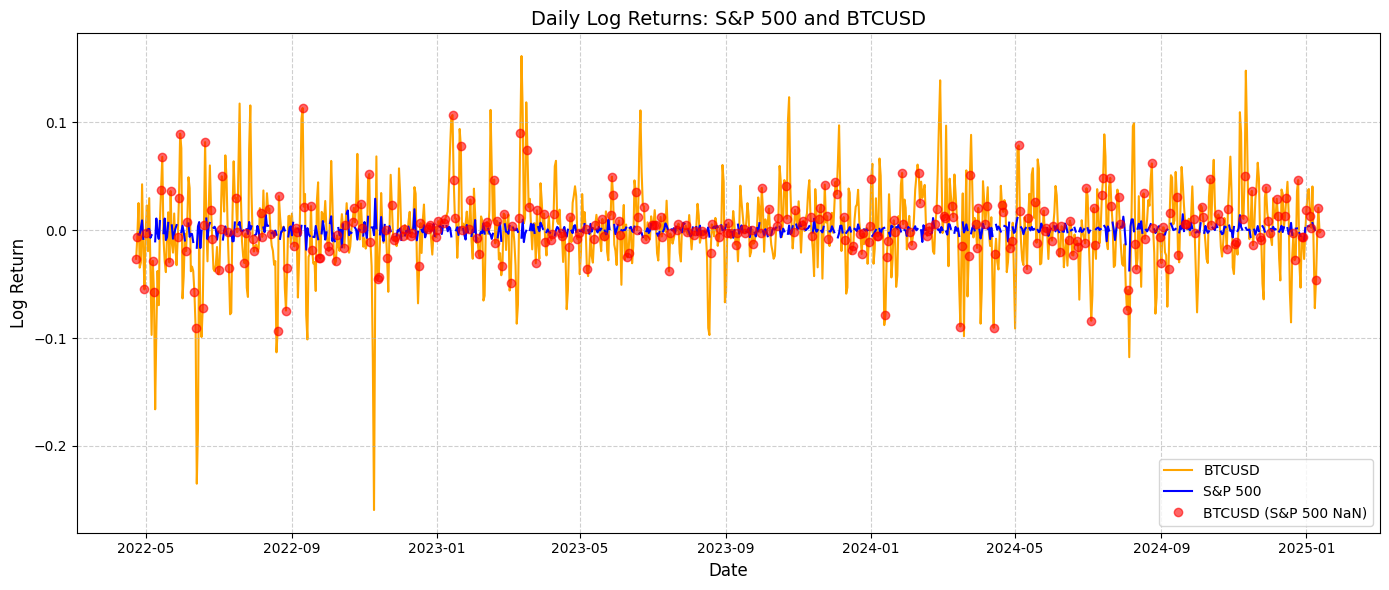

In [9]:
sp500_col = "S&P 500 daily log return"
btc_col = "BTCUSD daily log return"

fig, ax = plt.subplots(figsize=(14, 6)) 

ax.plot(return_df.index, return_df[btc_col], label="BTCUSD", color="orange", linewidth=1.5, zorder=1)
ax.plot(return_df.index, return_df[sp500_col], label="S&P 500", color="blue", linewidth=1.5, zorder=2)

nan_mask = return_df[sp500_col].isna()
if nan_mask.any():
    ax.plot(return_df.index[nan_mask], return_df[btc_col][nan_mask], 'o', color='red', label='BTCUSD (S&P 500 NaN)', alpha=0.6)


ax.set_title("Daily Log Returns: S&P 500 and BTCUSD", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Log Return", fontsize=12)
ax.legend(fontsize=10)


ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

In [10]:
return_df['S&P 500 daily log return Shift up'] = return_df['S&P 500 daily log return'].shift(-1)

In [11]:
#cleaned_df = return_df.dropna(subset=["S&P 500 daily log return Shift up"])
#cleaned_df = cleaned_df[cleaned_df["S&P 500 close days"] != False]
cleaned_df = return_df[(return_df['Day_of_Week'] == 'Sunday')] 

cleaned_df = cleaned_df.iloc[1:]
cleaned_df = cleaned_df.drop(['S&P 500 daily log return' , 'S&P 500 close days'] , axis = 1)
cleaned_df = cleaned_df.dropna(axis = 0)
cleaned_df

,BTCUSD daily log return,Day_of_Week,S&P 500 daily log return Shift up
timestamp,,,
2022-05-01,-0.002713,Sunday,-0.000320
2022-05-08,-0.057091,Sunday,-0.010255
2022-05-15,0.068129,Sunday,-0.002705
2022-05-22,0.036426,Sunday,0.004618
2022-06-05,0.007775,Sunday,0.006352
...,...,...,...
2024-12-15,0.029533,Sunday,0.002097
2024-12-22,-0.027728,Sunday,0.001584
2024-12-29,-0.006472,Sunday,-0.008438


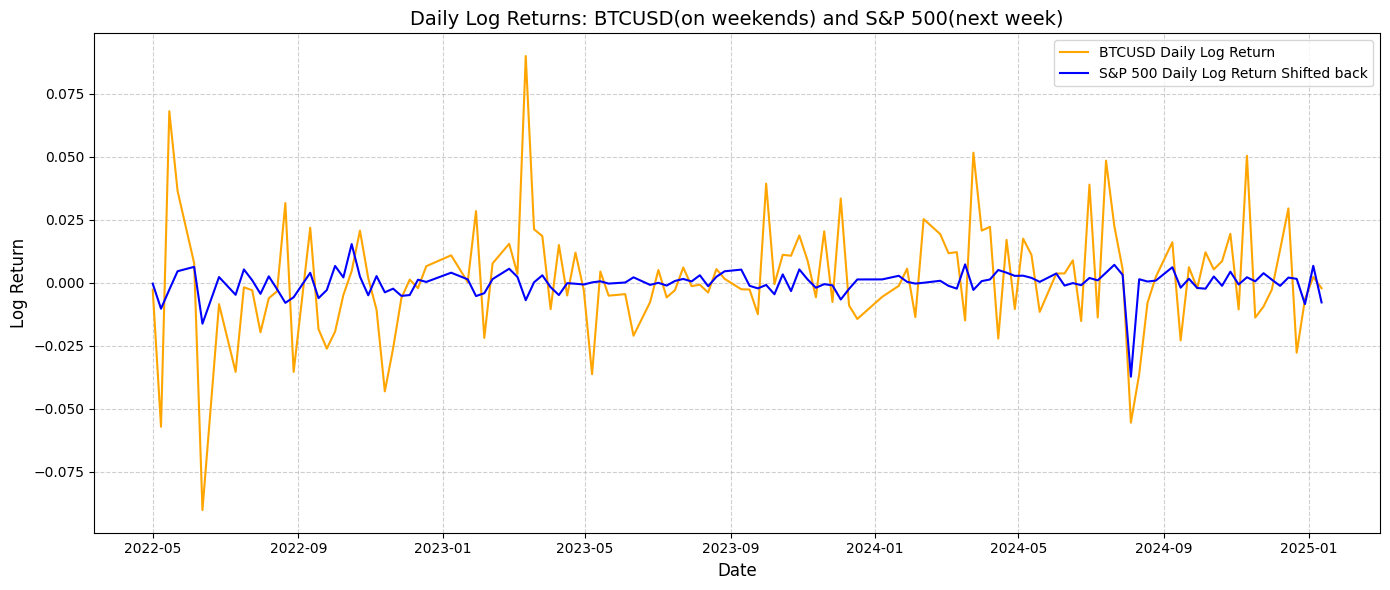

In [12]:
import matplotlib.pyplot as plt

btc_col = "BTCUSD daily log return"
sp500_col = "S&P 500 daily log return Shift up"

fig, ax = plt.subplots(figsize=(14, 6))  # Stretch horizontally with figsize

ax.plot(cleaned_df.index, cleaned_df[btc_col], label="BTCUSD Daily Log Return", color="orange", linewidth=1.5)
ax.plot(cleaned_df.index, cleaned_df[sp500_col], label="S&P 500 Daily Log Return Shifted back", color="blue", linewidth=1.5)

ax.set_title("Daily Log Returns: BTCUSD(on weekends) and S&P 500(next week)", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Log Return", fontsize=12)
ax.legend(fontsize=10)

ax.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("btc_sp500 line plot.png", dpi=500, bbox_inches='tight')
plt.show()

In [13]:
np.corrcoef(cleaned_df["BTCUSD daily log return"], cleaned_df["S&P 500 daily log return Shift up"])

array([[1.        , 0.31307974],
       [0.31307974, 1.        ]])

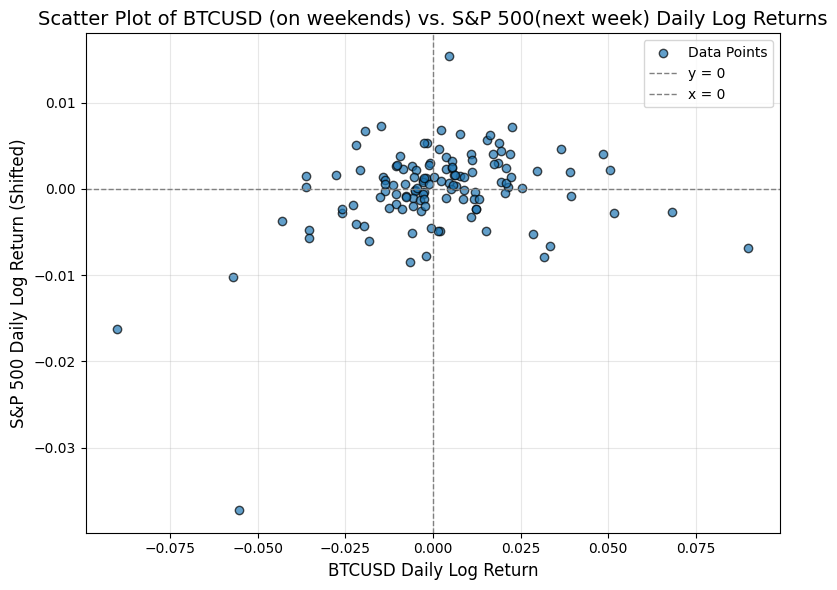

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df["BTCUSD daily log return"], cleaned_df["S&P 500 daily log return Shift up"], 
            alpha=0.7, edgecolor='k', label="Data Points")

plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, label="y = 0")
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1, label="x = 0")

plt.title("Scatter Plot of BTCUSD (on weekends) vs. S&P 500(next week) Daily Log Returns", fontsize=14)
plt.xlabel("BTCUSD Daily Log Return", fontsize=12)
plt.ylabel("S&P 500 Daily Log Return (Shifted)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("btc_sp500_scatter_plot.png", dpi=500, bbox_inches='tight')
plt.show()

In [15]:
btc_col = "BTCUSD daily log return"
sp500_col = "S&P 500 daily log return Shift up"

valid_data = cleaned_df[[btc_col, sp500_col]].dropna()

btc_sign = valid_data[btc_col] > 0
sp500_sign = valid_data[sp500_col] > 0

positive_positive = ((btc_sign) & (sp500_sign)).sum()
negative_negative = ((~btc_sign) & (~sp500_sign)).sum()

total_cases = len(valid_data)

positive_positive_percentage = (positive_positive / total_cases) * 100
negative_negative_percentage = (negative_negative / total_cases) * 100

print(f"Percentage of cases where both are positive: {positive_positive_percentage:.2f}%")
print(f"Percentage of cases where both are negative: {negative_negative_percentage:.2f}%")

Percentage of cases where both are positive: 33.60%
Percentage of cases where both are negative: 27.20%


In [16]:
cleaned_df

,BTCUSD daily log return,Day_of_Week,S&P 500 daily log return Shift up
timestamp,,,
2022-05-01,-0.002713,Sunday,-0.000320
2022-05-08,-0.057091,Sunday,-0.010255
2022-05-15,0.068129,Sunday,-0.002705
2022-05-22,0.036426,Sunday,0.004618
2022-06-05,0.007775,Sunday,0.006352
...,...,...,...
2024-12-15,0.029533,Sunday,0.002097
2024-12-22,-0.027728,Sunday,0.001584
2024-12-29,-0.006472,Sunday,-0.008438
